# The use case for bivariate kernel density estimate in web analytics
By gathering the mouse movements of few users we are able to determine where are the users moving their cursors.
To display the heatmap of the cusor location we overlap the bivariate kernel density estimate plot with a screenshot of the studies web page.
The data set is simulated.

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [26]:
page_img = mpimg.imread('page.png')

df = pd.read_csv('metrics.csv', names = ['time_stamp', 'x', 'y', 'width', 'high', 'session_id'])

In [28]:
print(df.head())

   time_stamp   x    y  width  high     session_id
0       19216  28  274   1000  1719  cf3b53b30f909
1       19246   8  278   1000  1719  cf3b53b30f909
2       19263   4  278   1000  1719  cf3b53b30f909
3       19368   3  277   1000  1719  cf3b53b30f909
4       19387   0  275   1000  1719  cf3b53b30f909


In [30]:
df = df[['x', 'y']]

In [19]:
ncolors = 256
color_array = plt.get_cmap('Reds')(range(ncolors))

color_array[:,-1] = np.linspace(0.0, 1.0, ncolors)

color_map = LinearSegmentedColormap.from_list(name = 'red_alpha', colors = color_array)

plt.register_cmap(cmap = color_map)

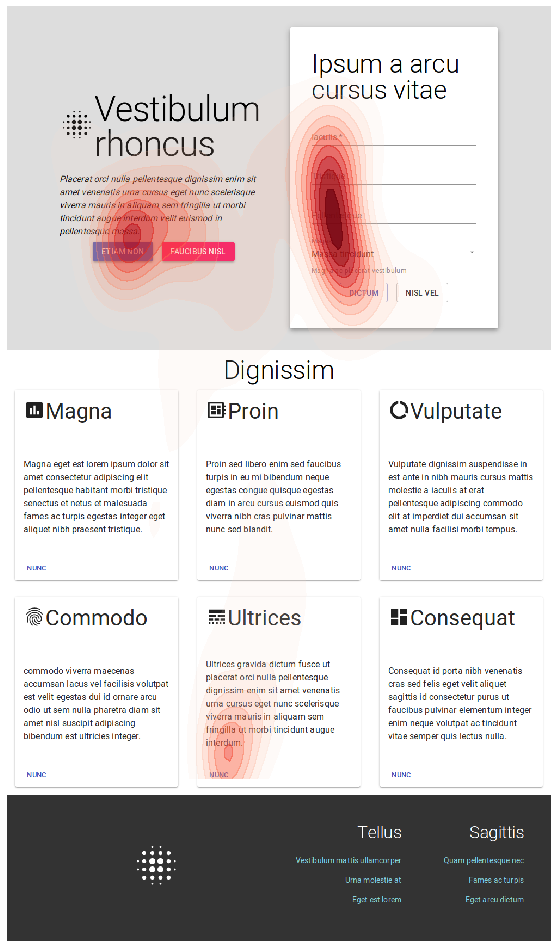

In [22]:
(height, width, _) = page_img.shape
sns.set(rc={'figure.figsize':(width/100, height/100)})

ax = sns.kdeplot(df['x'], df['y'], cmap = "red_alpha", shade = True, bw = 0.2)
ax.set_xlim([0, width])
ax.set_ylim([0, height])
ax.invert_yaxis()
ax.collections[0].set_alpha(0)
plt.axis('off')


plt.imshow(page_img, zorder = 0)
plt.savefig('heatmap.png', bbox_inches = 'tight', pad_inches = 0, dpi = 540)